# 🌳 Decision Tree Classifier: A Comprehensive Guide

A **Decision Tree** is a versatile, non-parametric supervised learning algorithm used for both classification and regression tasks. It models decisions as a tree-like structure, where internal nodes represent tests on features, branches represent the outcome of the test, and leaf nodes represent the final class label (for classification) or a predicted value (for regression).

This notebook will guide you through implementing a Decision Tree Classifier using scikit-learn, focusing on its interpretation and the importance of hyperparameter tuning (pruning) to prevent overfitting.

---
## 1. Importing Essential Libraries

In [1]:
# Data manipulation and visualization
import matplotlib.pyplot as plt

# Scikit-learn modules for modeling, metrics, and data utility
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

---
## 2. Data Loading and Preparation: The Iris Dataset

We will use the famous **Iris dataset**, a classic benchmark dataset in machine learning for classification tasks. It contains 150 samples of iris flowers, categorized into three species (classes: Iris Setosa, Iris Versicolour, and Iris Virginica), based on four features (sepal length, sepal width, petal length, and petal width).

### Splitting the Data
It is crucial to split the data into **training** and **testing** sets. The model learns patterns from the training set, and its performance is evaluated on the unseen testing set to estimate its **generalization ability**.

We use a standard **70/30 split** (70% for training, 30% for testing) and set `random_state` for reproducibility.

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (Sepal Length/Width, Petal Length/Width)
y = iris.target  # Target (Species: 0, 1, 2)

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---
## 3. Model Training: Unconstrained Decision Tree

By default, the `DecisionTreeClassifier` in scikit-learn uses the **Gini Impurity** criterion and allows the tree to grow until every leaf node is pure (contains only one class) or contains fewer than `min_samples_split` samples. This unconstrained growth often leads to a model that is highly complex and prone to **overfitting**.

In [3]:
# Initialize the classifier with default settings
clf_unconstrained = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf_unconstrained.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


---
## 4. Model Evaluation: Assessing Initial Performance

We use the test set, which the model has never seen, to evaluate its real-world performance.

In [4]:
# Make predictions on the test set
y_pred_unconstrained = clf_unconstrained.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_unconstrained)
print(f"Test Accuracy (Unconstrained): {accuracy:.2f}")

# Classification Report (detailed metrics)
print("\nClassification Report (Unconstrained):\n")
print(classification_report(y_test, y_pred_unconstrained))

Test Accuracy (Unconstrained): 1.00

Classification Report (Unconstrained):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Analysis of Initial Results

The model achieves a **100% accuracy** in this case. While this seems perfect, it's common for an unconstrained Decision Tree on small, clean datasets like Iris. This result, however, suggests the tree is overly complex and might be memorizing the training data. The next section explores this visually and introduces how to create a simpler, more robust model.

* **Precision**: The ability of the classifier not to label as positive a sample that is negative (i.e., how many selected items are relevant).
* **Recall**: The ability of the classifier to find all the positive samples (i.e., how many relevant items are selected).
* **F1-score**: The harmonic mean of precision and recall; a single metric that balances both concerns.

---
## 5. Visualizing the Unconstrained Decision Tree

Visualizing the tree helps us understand the specific decision rules the model learned. Note how deep the tree goes, reflecting its complexity.

Text(0.5, 1.0, 'Unconstrained Decision Tree Classifier (Max Depth: None)')

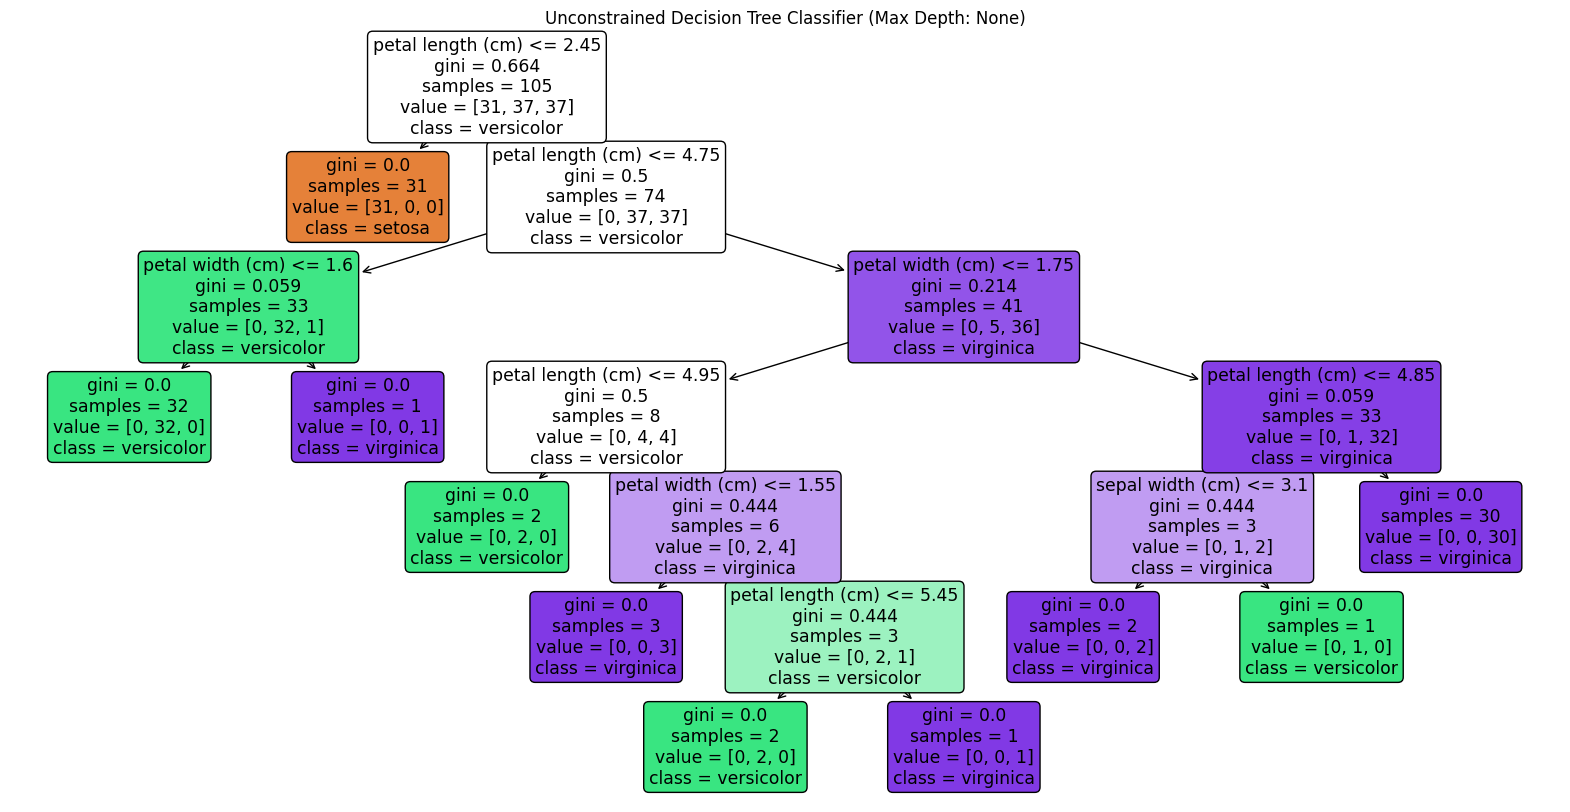

In [5]:
plt.figure(figsize=(20, 10))
plot_tree(clf_unconstrained, 
          filled=True, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          rounded=True)
plt.title("Unconstrained Decision Tree Classifier (Max Depth: None)")


### Interpreting a Node

Each node box represents a decision rule:
* **Feature <= Threshold**: The splitting condition (e.g., `petal length (cm) <= 2.45`). Samples satisfying the condition go to the left branch; others go to the right.
* **gini**: The **Gini Impurity** value. This measures the probability of a randomly chosen element being incorrectly classified if it was randomly classified according to the distribution of classes in the node. A `gini` of **0.0** means perfect purity (only one class present).
* **samples**: The number of training samples that reached this node.
* **value**: The distribution of samples across the classes (e.g., `[40, 42, 3]` means 40 samples of class 0, 42 of class 1, and 3 of class 2).
* **class**: The majority class for the samples in that node (the predicted class).

---
## 6. Hyperparameter Tuning and Pruning (Fighting Overfitting)

The unconstrained tree is highly specific. In most real-world scenarios, this leads to **high variance** and poor performance on new data.

**Pruning** is a critical technique used to simplify the decision tree by limiting its growth. This improves the model's ability to **generalize**.

We perform **pre-pruning** by using the hyperparameter `max_depth` to set a limit on how deep the tree can grow.

In [6]:
# Initialize the constrained classifier, setting max_depth=3
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the pruned model
clf_pruned.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


---
## 7. Visualizing and Evaluating the Pruned Model

Notice how the structure is much simpler, making the decision logic clearer and more interpretable.

Text(0.5, 1.0, 'Pruned Decision Tree Classifier (Max Depth: 3)')

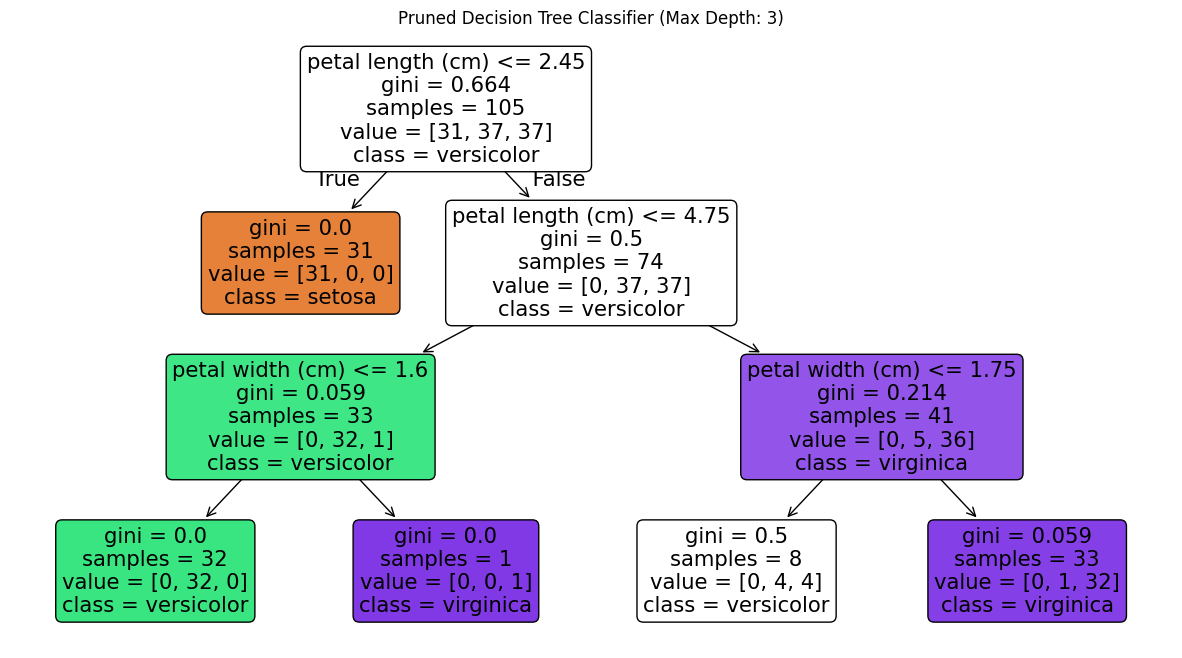

In [7]:
# Visualize the pruned decision tree
plt.figure(figsize=(15, 8))
plot_tree(clf_pruned, 
          filled=True, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          rounded=True)
plt.title("Pruned Decision Tree Classifier (Max Depth: 3)")


In [8]:
# Make predictions using the pruned model
y_pred_pruned = clf_pruned.predict(X_test)

# Calculate the new accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Pruned Model Test Accuracy (max_depth=3): {accuracy_pruned:.2f}")

print("\nClassification Report (Pruned):\n")
print(classification_report(y_test, y_pred_pruned))

Pruned Model Test Accuracy (max_depth=3): 1.00

Classification Report (Pruned):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Conclusion on Pruning

In this specific case with the Iris dataset, the accuracy remains **1.00** even with a significantly simpler tree. This demonstrates that the deeper branches in the original tree were unnecessary for making correct predictions on the test set and were likely capturing noise in the training data.

By using **pruning** (via `max_depth`), we created a model that is:
* **More Robust**: Less sensitive to minor variations in the training data.
* **More Interpretable**: Easier for humans to understand the final decision logic.
* **Better for Generalization**: In larger, noisier datasets, this approach is vital to maintain high performance on unseen data.